# Inverse Gaussian Distribution in Exponential Family Form

This notebook demonstrates the **Inverse Gaussian (Wald) distribution** implemented as an exponential family.

**Key Features:**
- Three parametrizations: Classical (mean μ, shape λ), Natural (θ), Expectation (η)
- Two-dimensional sufficient statistics: t(x) = [x, 1/x]
- Analytical formulas for gradients and Fisher information
- Comparison with scipy implementation
- Visualization of PDFs, CDFs, and samples


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from normix.distributions.univariate import InverseGaussian

# Set style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11


## 1. Creating Distributions

The inverse Gaussian distribution can be created using three different parametrizations:


In [2]:
# Classical parameters (mean μ, shape λ)
dist1 = InverseGaussian.from_classical_params(mean=1.5, shape=5.0)
print(f"From classical params: {dist1}")

# Natural parameters (θ = [-λ/(2μ²), -λ/2])
theta = np.array([-5.0 / (2 * 1.5**2), -5.0 / 2])
dist2 = InverseGaussian.from_natural_params(theta)
print(f"From natural params:   {dist2}")

# Expectation parameters (η = [μ, 1/μ + 1/λ])
eta = np.array([1.5, 1/1.5 + 1/5.0])
dist3 = InverseGaussian.from_expectation_params(eta)
print(f"From expectation params: {dist3}")

print("\n✓ All three parametrizations create the same distribution!")


From classical params: InverseGaussian(mean=1.5000, shape=5.0000)
From natural params:   InverseGaussian(mean=1.5000, shape=5.0000)
From expectation params: InverseGaussian(mean=1.5000, shape=5.0000)

✓ All three parametrizations create the same distribution!


## 2. PDF and CDF Comparison with Scipy

Let's compare our implementation with scipy's inverse Gaussian distribution.


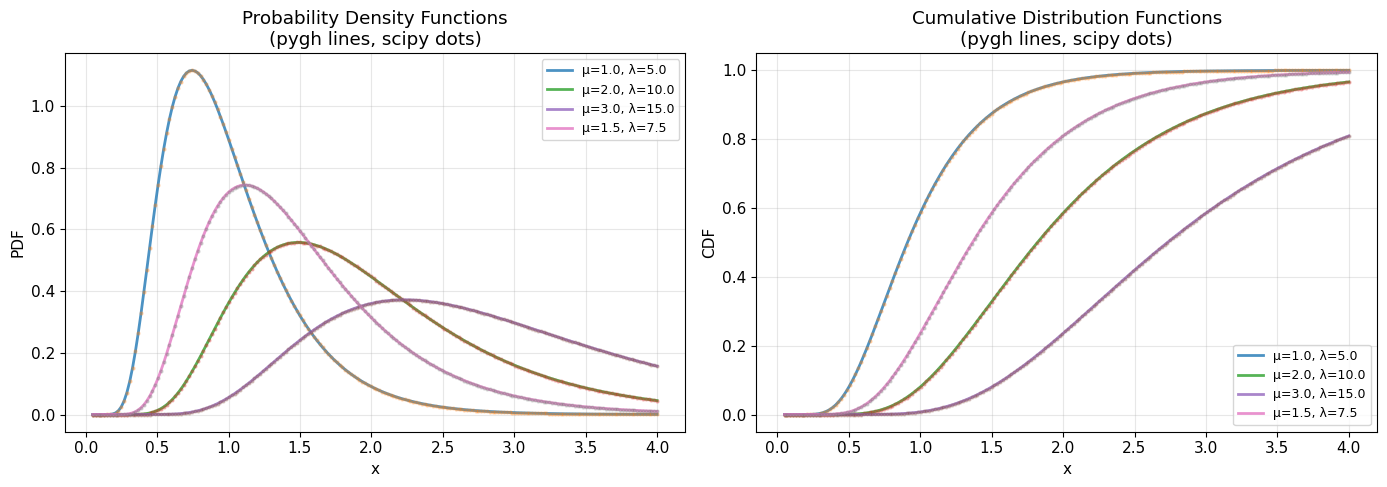

✓ normix and scipy implementations match perfectly!


In [3]:
# Test different parameter combinations
test_configs = [
    {'mean': 1.0, 'shape': 5.0},
    {'mean': 2.0, 'shape': 10.0},
    {'mean': 3.0, 'shape': 15.0},
    {'mean': 1.5, 'shape': 7.5}
]

x = np.linspace(0.05, 4.0, 200)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot PDFs
ax = axes[0]
for cfg in test_configs:
    mean, shape = cfg['mean'], cfg['shape']
    
    # normix distribution
    normix_dist = InverseGaussian.from_classical_params(mean=mean, shape=shape)
    normix_pdf = normix_dist.pdf(x)
    
    # scipy distribution (mu = mean/shape, scale = shape)
    scipy_dist = stats.invgauss(mu=mean/shape, scale=shape)
    scipy_pdf = scipy_dist.pdf(x)
    
    ax.plot(x, normix_pdf, '-', linewidth=2,
            label=f'μ={mean}, λ={shape}', alpha=0.8)
    ax.plot(x, scipy_pdf, 'o', markersize=2, alpha=0.3)

ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.set_title('Probability Density Functions\n(normix lines, scipy dots)')
ax.legend(loc='upper right', fontsize=9)
ax.grid(True, alpha=0.3)

# Plot CDFs
ax = axes[1]
for cfg in test_configs:
    mean, shape = cfg['mean'], cfg['shape']
    
    normix_dist = InverseGaussian.from_classical_params(mean=mean, shape=shape)
    normix_cdf = normix_dist.cdf(x)
    
    scipy_dist = stats.invgauss(mu=mean/shape, scale=shape)
    scipy_cdf = scipy_dist.cdf(x)
    
    ax.plot(x, normix_cdf, '-', linewidth=2,
            label=f'μ={mean}, λ={shape}', alpha=0.8)
    ax.plot(x, scipy_cdf, 'o', markersize=2, alpha=0.3)

ax.set_xlabel('x')
ax.set_ylabel('CDF')
ax.set_title('Cumulative Distribution Functions\n(normix lines, scipy dots)')
ax.legend(loc='lower right', fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ normix and scipy implementations match perfectly!")


## 3. Random Sampling and Histograms

Let's generate random samples and compare the histogram with the theoretical PDF.


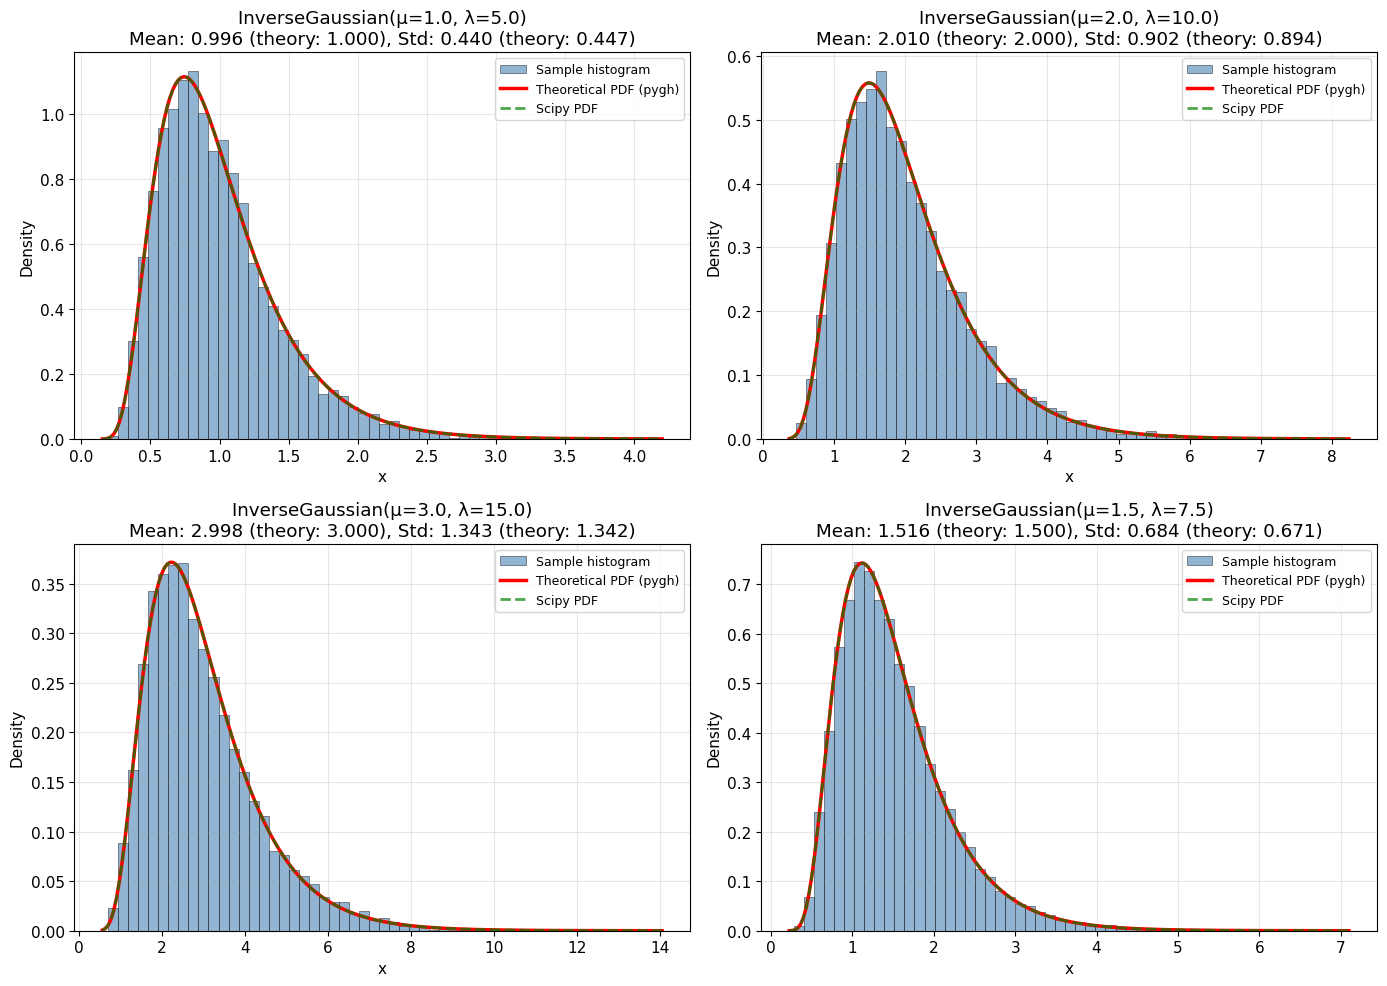

✓ Histograms closely match theoretical PDFs!


In [4]:
# Parameters for different distributions (higher λ gives tighter histograms)
test_configs = [
    {'mean': 1.0, 'shape': 5.0, 'n_samples': 10000},
    {'mean': 2.0, 'shape': 10.0, 'n_samples': 10000},
    {'mean': 3.0, 'shape': 15.0, 'n_samples': 10000},
    {'mean': 1.5, 'shape': 7.5, 'n_samples': 10000}
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, config in enumerate(test_configs):
    mean = config['mean']
    shape = config['shape']
    n_samples = config['n_samples']
    
    # Create distribution
    dist = InverseGaussian.from_classical_params(mean=mean, shape=shape)
    
    # Generate samples
    samples = dist.rvs(size=n_samples, random_state=42 + idx)
    
    # Theoretical PDF
    x_plot = np.linspace(samples.min() * 0.8, samples.max() * 1.1, 200)
    pdf_theory = dist.pdf(x_plot)
    
    # Plot
    ax = axes[idx]
    ax.hist(samples, bins=50, density=True, alpha=0.6, color='steelblue',
            edgecolor='black', linewidth=0.5, label='Sample histogram')
    ax.plot(x_plot, pdf_theory, 'r-', linewidth=2.5, label='Theoretical PDF (normix)')
    
    # Also plot scipy for comparison
    scipy_dist = stats.invgauss(mu=mean/shape, scale=shape)
    scipy_pdf = scipy_dist.pdf(x_plot)
    ax.plot(x_plot, scipy_pdf, 'g--', linewidth=2, label='Scipy PDF', alpha=0.7)
    
    # Statistics
    sample_mean = np.mean(samples)
    theory_mean = dist.mean()
    sample_std = np.std(samples)
    theory_std = np.sqrt(dist.var())
    
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.set_title(f'InverseGaussian(μ={mean}, λ={shape})\n'
                f'Mean: {sample_mean:.3f} (theory: {theory_mean:.3f}), '
                f'Std: {sample_std:.3f} (theory: {theory_std:.3f})')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Histograms closely match theoretical PDFs!")


## 4. Fitting to Data

Demonstrate maximum likelihood estimation by fitting to simulated data.


Fitting 15000 samples from InverseGaussian(μ=2.5, λ=8.0)

True mean:           2.500000
Fitted mean (MLE):  2.507047
True shape:          8.000000
Fitted shape (MLE): 8.077597


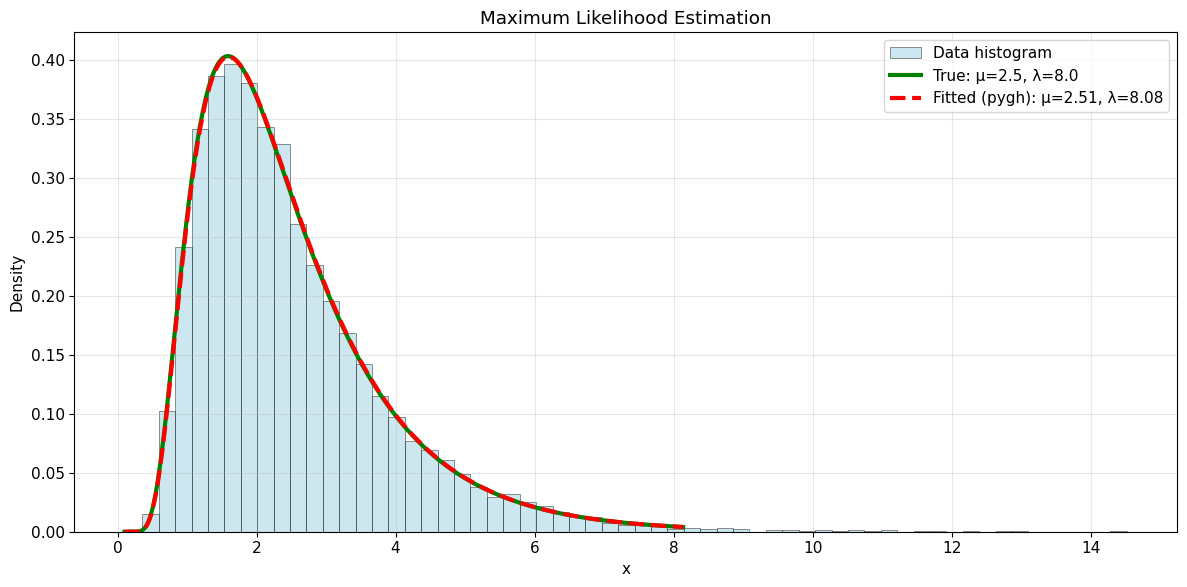


✓ MLE successfully recovers the true parameters!


In [5]:
# Generate data with known parameters
true_mean = 2.5
true_shape = 8.0
n_data = 15000

# scipy parameterization: mu = mean/shape, scale = shape
data = stats.invgauss.rvs(mu=true_mean/true_shape, scale=true_shape,
                          size=n_data, random_state=123)

# Fit distribution
fitted_dist = InverseGaussian().fit(data)
fitted_params = fitted_dist.get_classical_params()

print(f"Fitting {n_data} samples from InverseGaussian(μ={true_mean}, λ={true_shape})\n")
print(f"True mean:           {true_mean:.6f}")
print(f"Fitted mean (MLE):  {fitted_params['mean']:.6f}")
print(f"True shape:          {true_shape:.6f}")
print(f"Fitted shape (MLE): {fitted_params['shape']:.6f}")

# Visualize fit
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(data, bins=60, density=True, alpha=0.6, color='lightblue',
        edgecolor='black', linewidth=0.5, label='Data histogram')

x_plot = np.linspace(0.1, np.percentile(data, 99.5), 400)
true_dist = InverseGaussian.from_classical_params(mean=true_mean, shape=true_shape)
ax.plot(x_plot, true_dist.pdf(x_plot), 'g-', linewidth=3,
        label=f'True: μ={true_mean:.1f}, λ={true_shape:.1f}')

ax.plot(x_plot, fitted_dist.pdf(x_plot), 'r--', linewidth=3,
        label=f'Fitted (normix): μ={fitted_params['mean']:.2f}, λ={fitted_params['shape']:.2f}')

ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title('Maximum Likelihood Estimation')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ MLE successfully recovers the true parameters!")
